# 실습 - 분류(classification)


# **1. 필요한 라이브러리 불러오기**

In [1]:
# 데이터, 시각화 관련 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# classification 관련 라이브러리
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# training set, test set 분리를 위한 라이브러리
from sklearn.model_selection import train_test_split 

# classification 평가를 위한 라이브러리
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

# 붓꽃(Iris) 데이터 로딩
from sklearn.datasets import load_iris

# **2. 간단한 예제(로지스틱회귀)**

In [2]:
# training data 정의
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([0, 0, 0, 1, 1, 1])

# test data 정의
test_X = [[-2, 2]]

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

ax.scatter([-1, -2, -3], [-1, -1, -2], [0, 0, 0], color='blue')
ax.scatter([1, 2, 3], [1, 1, 2], [1, 1, 1], color='red')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

plt.show()

In [ ]:
# training
clf_lr = LogisticRegression()
clf_lr.fit(X, y)

In [ ]:
# 클래스 확률 예측
clf_lr.predict_proba(test_X)

In [ ]:
# 클래스 예측
clf_lr.predict(test_X)

# **3. 간단한 예제(LDA)**

In [ ]:
# training
clf_lda = LinearDiscriminantAnalysis()
clf_lda.fit(X, y)

In [ ]:
# 클래스 확률 예측
clf_lda.predict_proba(test_X)

In [ ]:
# 클래스 예측
clf_lda.predict(test_X)

# **4. Heart 데이터 예제**

In [ ]:
# 데이터 loading
from google.colab import drive
drive.mount('/content/drive')

heart = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/data/Heart.csv")

In [ ]:
heart

In [12]:
# predictor와 response 정의
X = heart[["Age", "Sex", "Chol"]]
y = heart["AHD"]
 
# training set, test set 구분
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0, stratify=y)
 
# training
clf_heart = LinearDiscriminantAnalysis()
clf_heart.fit(X_train, y_train)
y_pred = clf_heart.predict(X_test)

In [ ]:
y_test

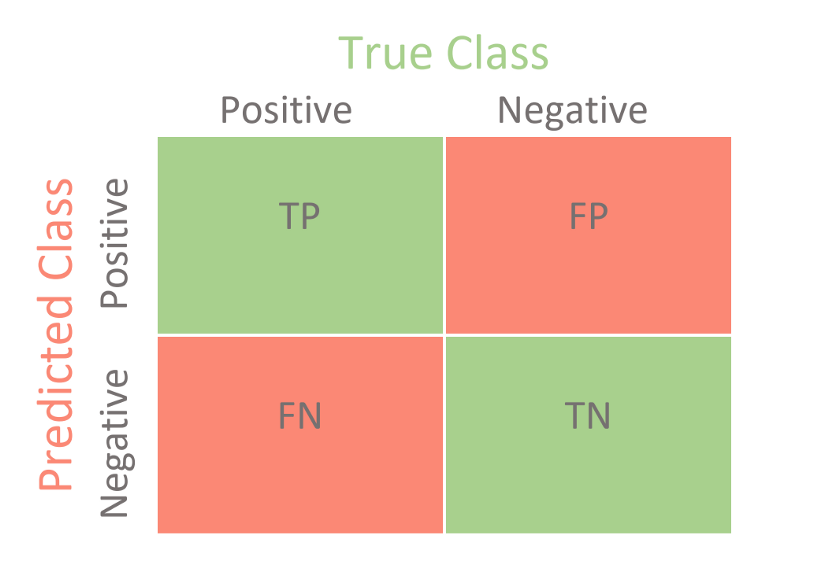

In [ ]:
# confusion matrix 생성 
cm = confusion_matrix(y_test, y_pred)
cm

In [ ]:
# classification 결과  평가

# Precision: TP/(TP+FP)
print(precision_score(y_test, y_pred, average="macro"))

# Recall: TP/(TP+FN)
print(recall_score(y_test, y_pred, average="macro"))

# Accuracy: (TP+TN)/all
print(accuracy_score(y_test, y_pred))

# **5. 붓꽃(Iris) 데이터 예제**

In [16]:
X_iris, y_iris = load_iris(return_X_y=True)

In [ ]:
y_iris

In [ ]:
# training
clf = LogisticRegression(random_state=0).fit(X_iris, y_iris)

# 클래스 예측
clf.predict(X_iris)

In [ ]:
# 클래스 확률 예측
clf.predict_proba(X_iris)

In [ ]:
# accuracy
clf.score(X_iris, y_iris)